# Classificação de TEPT ou não-TEPT dos cérebros durante o Real_Mut

## Importação das bibliotecas

In [222]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Exemplo de dado de um indivíduo

In [223]:
test_load = nib.load(r"C:\Users\mathe\Downloads\Dados de fMRI\Pct\P057_DESIGN MATRIX\beta_0002.nii")
print(test_load.shape)  #formato do dado  

(53, 63, 52)


In [224]:
print(test_load.get_data_dtype())  #tipo do dado

float32


## Corte no eixo ??? (terceira coordenada)

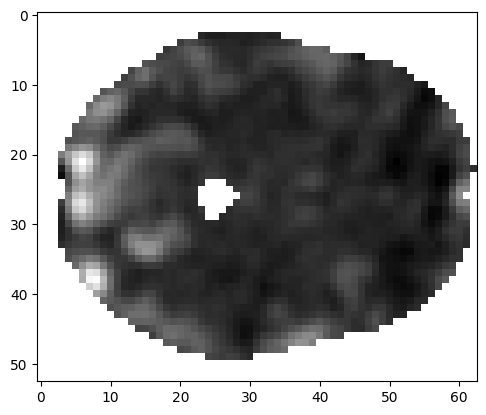

In [225]:
plt.imshow(test_load.get_fdata()[:, :, 25], cmap = 'gray')
plt.show()

## Visualização da matriz 3d

In [226]:
image_data = test_load.get_fdata()
print(image_data[22:25, 22:25, 22:25])

[[[0.38867477 0.40167245 0.37895319]
  [0.40966746 0.74085206 0.67514724]
  [0.55785286 0.92244506 0.93172944]]

 [[0.11798459 0.19166385 0.27954236]
  [0.1413319  0.41649586 0.50540626]
  [0.34249032 0.64271194 0.83507603]]

 [[0.06096784 0.15812156 0.26399234]
  [0.02988608 0.29376054 0.45645544]
  [0.1354551  0.41567153 0.70155782]]]


## Corte no eixo ??? (primeira coordenada)

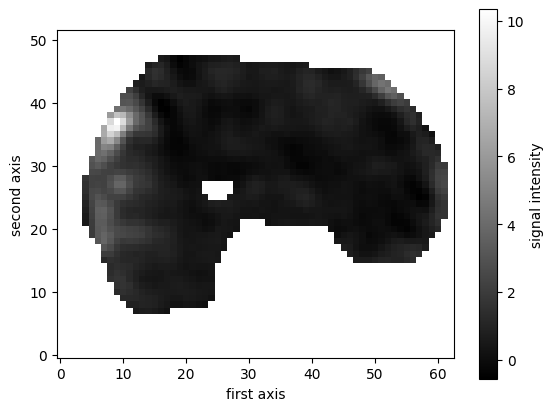

In [227]:
mid_slice_x = image_data[24, :, :]

plt.imshow(mid_slice_x.T, cmap = 'gray', origin = 'lower')
plt.xlabel('first axis')
plt.ylabel('second axis')
plt.colorbar(label = 'signal intensity')
plt.show()

In [228]:
import os


def join_nii_files(parent_directory):

    file_name_pattern = "beta_0002.nii"

    subdirectories = [d for d in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, d))]

    individual_data = []

    for subdirectory in subdirectories:
        file_path = os.path.join(parent_directory, subdirectory, file_name_pattern)
        data_raw = nib.load(file_path)
        data = data_raw.get_fdata()
        individual_data.append(data)
    
    return individual_data

joined_data = np.concatenate((join_nii_files("C:\\Users\\mathe\\Downloads\\Dados de fMRI\\Pct"),
                            join_nii_files("C:\\Users\\mathe\\Downloads\\Dados de fMRI\\Cont")), axis=0)

print(joined_data.shape)

brain_data = np.stack(joined_data)

(42, 53, 63, 52)
